----------------------
#### Aim : how to do a sup classification using Keras
---------------------------

In [25]:
#!pip install tensorflow

In [1]:
import pandas as pd
import numpy  as np

from keras.utils import plot_model

In [3]:
location = r'https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/pima.txt'

In [4]:
data = pd.read_csv(location)

In [5]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
554,1,84,64,23,115,36.9,0.471,28,0
85,2,110,74,29,125,32.4,0.698,27,0
48,7,103,66,32,0,39.1,0.344,31,1
587,6,103,66,0,0,24.3,0.249,29,0
374,2,122,52,43,158,36.2,0.816,28,0


__Input__ Variables (X):

    Number of times pregnant
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-Hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)

__Output__ Variables (y):

    Class variable (0 or 1)

In [6]:
# split into input (X) and output (y) variables
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [7]:
X.shape

(768, 8)

#### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_val_scaled = scaler.fit_transform(X)

#### build the machine learning model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# define the keras model
model = Sequential()

model.add(Dense(units=8, input_dim=8, activation='relu',    name='Data-Input-Layer'))
model.add(Dense(units=8, input_dim=8, activation='relu',    name='Hidden-Layer-1'))
model.add(Dense(units=4, input_dim=8, activation='relu',    name='Hidden-Layer-2'))
model.add(Dense(units=1,              activation='sigmoid', name='Output-Layer'))

| Optimizer name      | Description                                            |
| ------------------- | ------------------------------------------------------ |
| class Adadelta:     | Optimizer that implements the Adadelta algorithm.      |
|class __Adagrad__:       | Optimizer that implements the Adagrad algorithm.       |
|class __Adam__:          | Optimizer that implements the Adam algorithm.|
|class Adamax:        | Optimizer that implements the Adamax algorithm.|
|class Ftrl:          | Optimizer that implements the FTRL algorithm.|
|class Nadam:         | Optimizer that implements the NAdam algorithm.|
|class Optimizer:     | Updated base class for optimizers.|
|class __RMSprop__:       | Optimizer that implements the RMSprop algorithm.|
|class __SGD__:           | Stochastic gradient descent and momentum optimizer.|

In [12]:
from tensorflow.keras import optimizers

In [13]:
sgd = optimizers.SGD(learning_rate=0.01)

In [14]:
# compile the keras model
model.compile(loss     = 'binary_crossentropy', 
              optimizer= sgd, 
              metrics  = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Data-Input-Layer (Dense)    (None, 8)                 72        
                                                                 
 Hidden-Layer-1 (Dense)      (None, 8)                 72        
                                                                 
 Hidden-Layer-2 (Dense)      (None, 4)                 36        
                                                                 
 Output-Layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


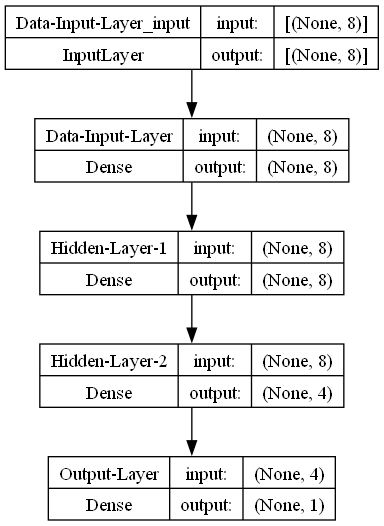

In [20]:
# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### train the model

In [16]:
%%time
# fit the keras model on the dataset
history = model.fit(  x         = X_val_scaled, 
                      y         = y, 
                      epochs    = 500, 
                      batch_size= 16,
                      validation_split = 0.2,
                      verbose = 2)

Epoch 1/500
39/39 - 3s - loss: 0.6879 - accuracy: 0.6498 - val_loss: 0.6838 - val_accuracy: 0.6429 - 3s/epoch - 80ms/step
Epoch 2/500
39/39 - 0s - loss: 0.6766 - accuracy: 0.6531 - val_loss: 0.6753 - val_accuracy: 0.6429 - 252ms/epoch - 6ms/step
Epoch 3/500
39/39 - 0s - loss: 0.6676 - accuracy: 0.6531 - val_loss: 0.6682 - val_accuracy: 0.6429 - 243ms/epoch - 6ms/step
Epoch 4/500
39/39 - 0s - loss: 0.6596 - accuracy: 0.6531 - val_loss: 0.6619 - val_accuracy: 0.6429 - 233ms/epoch - 6ms/step
Epoch 5/500
39/39 - 0s - loss: 0.6526 - accuracy: 0.6531 - val_loss: 0.6567 - val_accuracy: 0.6429 - 255ms/epoch - 7ms/step
Epoch 6/500
39/39 - 0s - loss: 0.6464 - accuracy: 0.6531 - val_loss: 0.6513 - val_accuracy: 0.6429 - 243ms/epoch - 6ms/step
Epoch 7/500
39/39 - 0s - loss: 0.6403 - accuracy: 0.6531 - val_loss: 0.6461 - val_accuracy: 0.6429 - 217ms/epoch - 6ms/step
Epoch 8/500
39/39 - 0s - loss: 0.6346 - accuracy: 0.6531 - val_loss: 0.6410 - val_accuracy: 0.6429 - 227ms/epoch - 6ms/step
Epoch 9/50

#### plot the model performance

In [23]:
import matplotlib.pyplot as plt

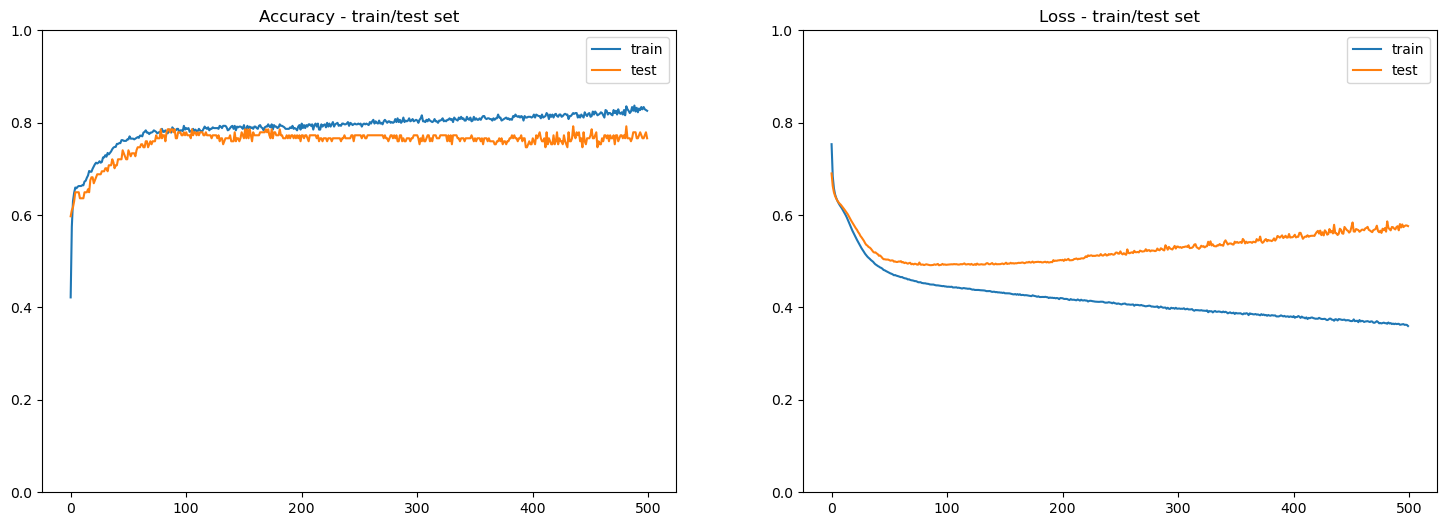

In [24]:
# plot training history

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(18,6))

ax1.plot(history.history['accuracy'],     label='train')
ax1.plot(history.history['val_accuracy'], label='test')
ax1.set_title('Accuracy - train/test set')
ax1.set_ylim([0,1])
ax1.legend()

ax2.plot(history.history['loss'],     label='train')
ax2.plot(history.history['val_loss'], label='test')
ax2.set_title('Loss - train/test set')
ax2.set_ylim([0,1])
ax2.legend();